<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("results_ca101.csv")
df.head()

,Instance,Type,Variant,Support,z,Status,Time,Omega,epsilon,delta,gamma,L
0,data/orLibrary/cap101,OR Library,ms,NaN,796648.437500,Optimal,0,0,0.0,0.0,0.0,0
1,data/orLibrary/cap101,OR Library,ellipsoidal,NaN,796766.632749,Optimal,0,1,0.9,0.0,0.0,0
2,data/orLibrary/cap101,OR Library,ellipsoidal,NaN,796884.827998,Optimal,1,2,0.9,0.0,0.0,0
3,data/orLibrary/cap101,OR Library,ellipsoidal,NaN,797003.023246,Optimal,0,3,0.9,0.0,0.0,0
4,data/orLibrary/cap101,OR Library,ellipsoidal,NaN,797121.218495,Optimal,0,4,0.9,0.0,0.0,0


/home/marco/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


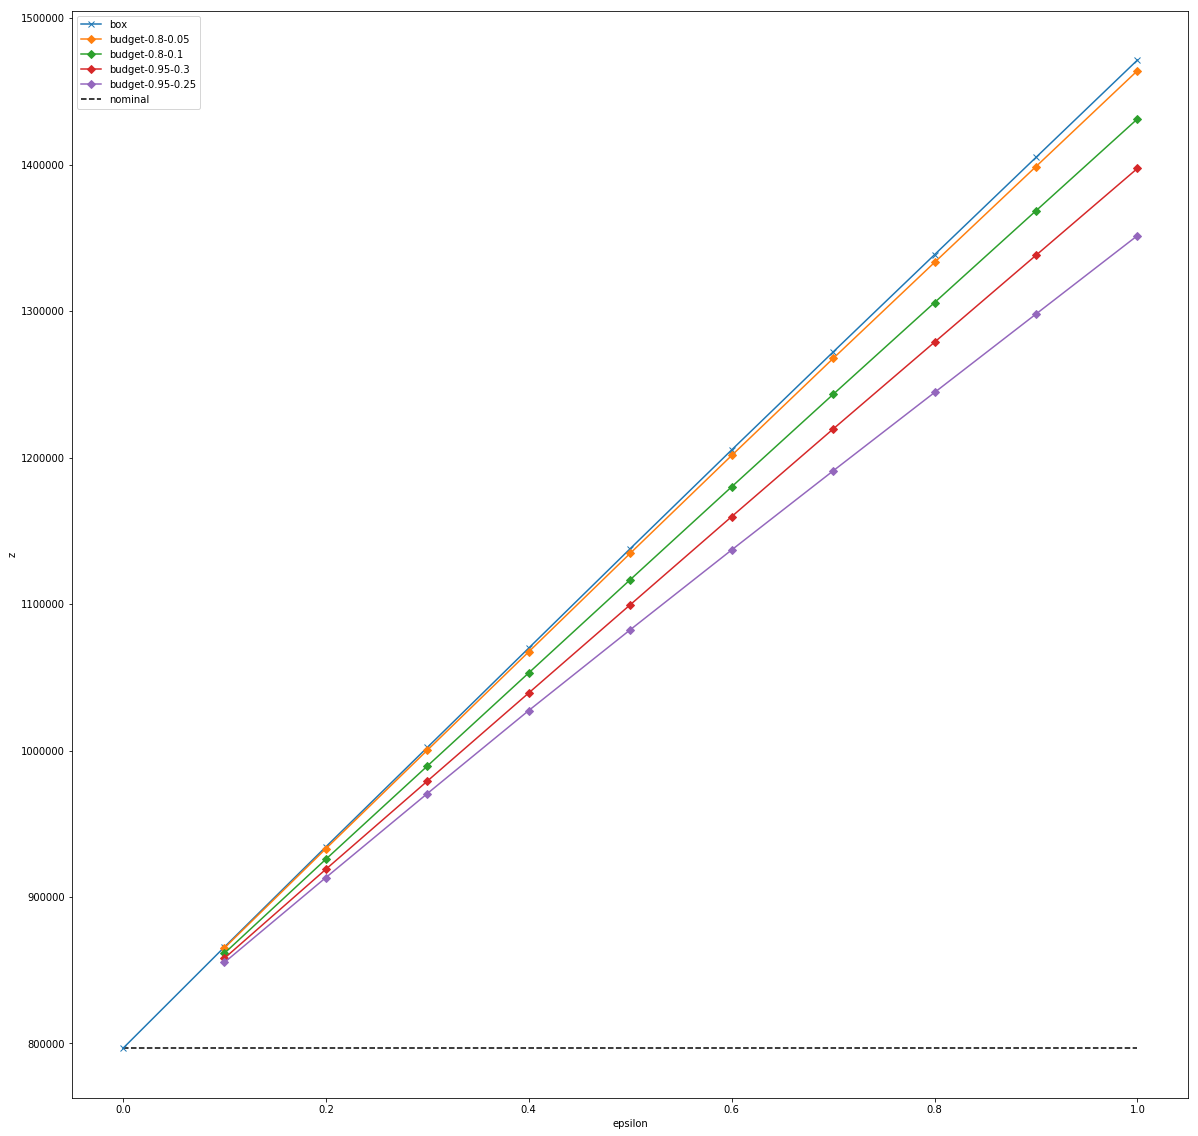

In [3]:
#print(df.dtypes)
plt.figure(figsize=(20,20))

# this is a "trick": Treat Omega as epsilon!!!
dfE = df[df.Variant=="ellipsoidal"]
dfE["epsilon"] = dfE["Omega"]/10
#lab = "ellips-Omega"
#plt.plot(dfE.epsilon, dfE.z, label=lab, marker='o',linewidth=3,linestyle="--")

# box support
dfAux = df[df['Variant']=='box']
lab = 'box'
plt.plot(dfAux.epsilon, dfAux.z, label=lab, marker='x')

# select values (combination of delta and gamma) for budget support
deltaSet = [0.8, 0.8, 0.95, 0.95]
gammaSet = [0.05, 0.1, 0.3, 0.25]

for variant in ["budget"]:
    for delta, gamma in zip(deltaSet, gammaSet):
        dfAux = df[(df['delta']==delta) & (df['gamma']==gamma) & (df['Variant']==variant)]
        lab = variant + "-" + str(delta) + "-" + str(gamma)
        plt.plot(dfAux.epsilon, dfAux.z, label=lab, marker='D')
        
# draw a line for nominal value
z = df[df["Variant"]=="ms"].z   
plt.hlines(z, 0, 1, label="nominal", linestyle="--")
plt.legend()
plt.xlabel("epsilon")
plt.ylabel("z")
plt.show()